In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

In [2]:
def get_features_targets(data):
    features = np.zeros((data.shape[0],4))
    features[:,0] = data['u'] - data['g']
    features[:,1] = data['g'] - data['r']
    features[:,2] = data['r'] - data['i']
    features[:,3] = data['i'] - data['z']

    targets = data['redshift']

    return features, targets 

In [3]:
def median_diff(predicted, actual):
    return np.median(np.abs(predicted - actual))

In [6]:
def cross_validate_model(model, features, targets, k):
    kf = KFold(n_splits=k, shuffle=True)

    median_diffs = list()

    for train_indices, test_indices in kf.split(features):
        train_features, test_features = features[train_indices], features[test_indices]
        train_targets, test_targets = targets[train_indices], targets[test_indices]

        model.fit(train_features, train_targets)
        median_diffs.append(median_diff(model.predict(test_features), test_targets))

    return median_diffs

In [7]:
data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)

# initialize model with a maximum depth of 19
dtr = DecisionTreeRegressor(max_depth=19)

# call your cross validation function
diffs = cross_validate_model(dtr, features, targets, 10)

# Print the values
print('Differences: {}'.format(', '.join(['{:.3f}'.format(val) for val in diffs])))
print('Mean difference: {:.3f}'.format(np.mean(diffs)))

Differences: 0.018, 0.017, 0.017, 0.017, 0.018, 0.017, 0.017, 0.018, 0.018, 0.017
Mean difference: 0.017


In [8]:
def cross_validate_predictions(model, features, targets, k):
    kf = KFold(n_splits=k, shuffle=True)
    all_predictions = np.zeros_like(targets)

    for train_indices, test_indices in kf.split(features):
        train_features, test_features = features[train_indices], features[test_indices]
        train_targets, test_targets = targets[train_indices], targets[test_indices]

        model.fit(train_features, train_targets)
        predictions = model.predict(test_features)

        all_predictions[test_indices] = predictions

    return all_predictions    

Median difference: 0.017


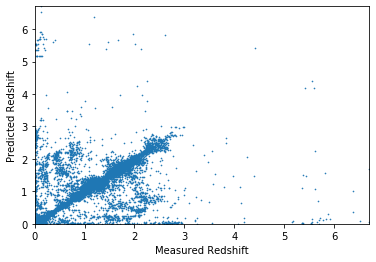

In [9]:
data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)

# initialize model
dtr = DecisionTreeRegressor(max_depth=19)

# call your cross validation function
predictions = cross_validate_predictions(dtr, features, targets, 10)

# calculate and print the rmsd as a sanity check
diffs = median_diff(predictions, targets)
print('Median difference: {:.3f}'.format(diffs))

# plot the results to see how well our model looks
plt.scatter(targets, predictions, s=0.4)
plt.xlim((0, targets.max()))
plt.ylim((0, predictions.max()))
plt.xlabel('Measured Redshift')
plt.ylabel('Predicted Redshift')
plt.show()

In [10]:
# those functions are already implemented in scikit
# cross_validate_model -> cross_val_score
# cross_validate_predictions -> cross_val_predict